# [연습문제] 서울시 청소년 정신 건강


[서울열린데이타광장](http://data.seoul.go.kr/dataList/datasetView.do?infId=10956&srvType=S&serviceKind=2) 사이트에서

엑셀파일을 다운받습니다.
<img src='./images/엑셀파일가져오기.PNG'/>

현재 디렉토리에 data 폴더에 저장한 후 저장한 엑셀파일명을 영문으로 수정하는 것을 권장합니다.

한글 파일명도 인식은 되지만 추후에 어떤 문제가 발생할 지도 모르기에 영문을 권장한다고 합니다.



### (1) 엑셀파일에서 데이타 가져오기

#### 1-1 우선 파일을 읽어서 출력

[출력결과]
<img src='./images/출력1.PNG'/>

In [5]:
# 여기에 코드
import pandas as pd
test = pd.read_excel('./data/teenage_mental.xls')
test

,기간,구분,스트레스 인지율,스트레스 인지율.1,스트레스 인지율.2,우울감 경험률,우울감 경험률.1,우울감 경험률.2,자살 생각률,자살 생각률.1,자살 생각률.2
0,기간,구분,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2018,구분,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


### 1-2 엑셀에서 필요한 부분만 추출하자

* header=1  :  첫번째 행을 제목으로

* usecols : 해당컬럼

[출력결과]
<img src='./images/출력2.PNG'/>

In [11]:
# 여기에 코드
pd.read_excel('./data/teenage_mental.xls', header = 1, usecols='C:K')

,전체,남학생,여학생,전체.1,남학생.1,여학생.1,전체.2,남학생.2,여학생.2
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


### 1-3 컬럼명을 지정하여 데이타 가져오기 (변수에 저장)

[출력결과]
<img src='./images/출력3.PNG'/>

In [15]:
# 컬럼이름을 지정
col_names = ['스트레스','스트레스남학생','스트레스여학생',
            '우을감경험률','우울남학생','우울여학생',
            '자살생각율','자살남학생','자살여학생']

# 변수에 저장하기(raw_data)
raw_data =pd.read_excel('./data/서울시청소년정신건강.xls',header=1, usecols='C:K')
raw_data

# 여기에 코드
raw_data.columns = col_names
raw_data

,스트레스,스트레스남학생,스트레스여학생,우을감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


### (2) 해당 데이타값의 반대값으로 행을 추가

예를 들어 스트레스를 받는다고 응답한 수가 42.7이면 

아니라고 응답한 수가 100 - 42.7= 57.3 이다.

각 항목에 반대로 응답한 수의 값을 행으로 추가한다

<img src='./images/출력4.PNG'>

In [20]:
# 반대의 데이타값을 가지는 행을 추가한다
raw_data.loc[1] = 100 - raw_data.loc[0]
# 여기에 코드
raw_data

,스트레스,스트레스남학생,스트레스여학생,우을감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


### (3) 응답 컬럼을 추가

- 0번째 데이타는 '그렇다'
- 1번째 데이타는 '아니다'

[출력결과]
<img src='./images/출력5.PNG'/>

In [22]:
# 응답 컬럼으로 '그렇다'와 '아니다' 값을 추가
# 여기에 코드
raw_data['응답'] = ['그렇다', '아니다']
raw_data

,스트레스,스트레스남학생,스트레스여학생,우을감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생,응답
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2,그렇다
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8,아니다


### (4) 응답컬럼을 인덱스로 만든다

 - drop=True : 기존 인덱스 컬럼을 제거   
    
 - inplace=True : 현재 데이타프레임으로 대치되어 변수지정을 안해도 된다 
    
    
[출력결과]    
<img src='./images/출력6.PNG'/>    

In [30]:
# 여기에 코드
# raw_data.set_index('응답', drop=True, inplace=True)
raw_data

,스트레스,스트레스남학생,스트레스여학생,우을감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
응답,,,,,,,,,
그렇다,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
아니다,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


# 시각화로 아래와 같이 출력하세요

[그래프 1]

<img src='./images/결과1.PNG'/>


---
[그래프 2]
<img src='./images/결과2.PNG'/>

In [32]:
%matplotlib inline

import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

# 폰트를 변경하면 '-' 기호가 네모로 변경되기에 '-'기호를 변경하지 않도록 설정
plt.rcParams['axes.unicode_minus'] = False

f_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

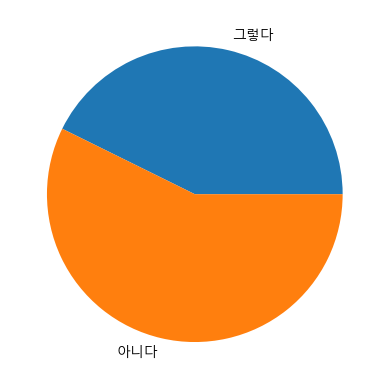

In [42]:
# 여기에 코드

plt.pie(raw_data['스트레스'], labels=raw_data.index)
plt.show()

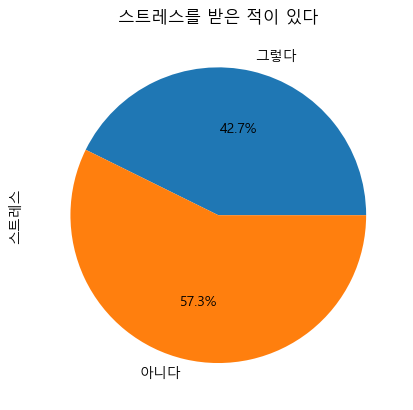

In [46]:
raw_data['스트레스'].plot(kind="pie", labels=raw_data.index, autopct='%0.1f%%', title='스트레스를 받은 적이 있다')
plt.show()

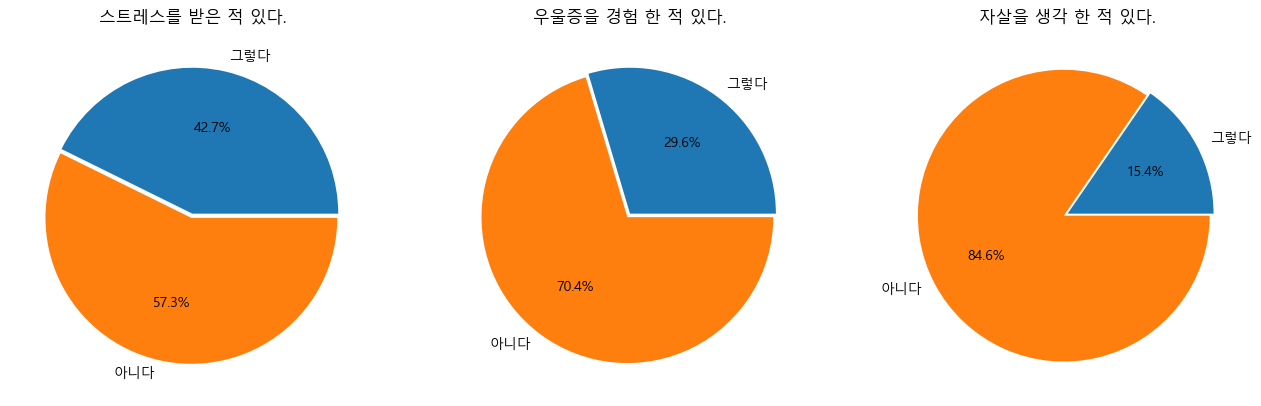

In [52]:

# fig, axs = plt.subplots(1,3)
# axs[0]=raw_data['스트레스']
# axs[0].plot(kind='pie', labels=raw_data.index, autopct='%0.1f%%', title='스트레스를 받은 적 있다')
# axs[1]=raw_data['우을감경험률']
# axs[1].plot(kind='pie', labels=raw_data.index, autopct='%0.1f%%', title='우울증을 경험한 적 있다')
# axs[2]=raw_data['자살생각율']
# axs[2].plot(kind='pie', labels=raw_data.index, autopct='%0.1f%%', title='자살을 생각한 적 있다')
# plt.show()

graph1 = raw_data['스트레스']
graph2 = raw_data['우을감경험률']
graph3 = raw_data['자살생각율']

plt.figure(figsize=(16,6))
a = plt.subplot(131)
b = plt.subplot(132)
c = plt.subplot(133)

a.set_title('스트레스를 받은 적 있다.')
b.set_title('우울증을 경험 한 적 있다.')
c.set_title('자살을 생각 한 적 있다.')

a.pie(graph1,labels=raw_data.index, autopct='%1.1f%%', explode=(0,0.03));
b.pie(graph2,labels=raw_data.index, autopct='%1.1f%%', explode=(0,0.03));
c.pie(graph3,labels=raw_data.index, autopct='%1.1f%%', explode=(0,0.03));